In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

In [ ]:
# Dados "https://brasil.io/home/"

In [7]:
df = pd.read_csv('caso.csv')
df.head()


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-02-10,AP,NaN,state,79504,1089,324,True,845731.0,861773.0,16.0,9225.63134,0.0137
1,2021-02-09,AP,NaN,state,79274,1086,323,False,845731.0,861773.0,16.0,9198.94218,0.0137
2,2021-02-08,AP,NaN,state,78990,1083,322,False,845731.0,861773.0,16.0,9165.98687,0.0137
3,2021-02-07,AP,NaN,state,78799,1079,321,False,845731.0,861773.0,16.0,9143.82326,0.0137
4,2021-02-06,AP,NaN,state,78646,1079,320,False,845731.0,861773.0,16.0,9126.06916,0.0137


In [10]:
# Usando a função (LOC) de localização podemos acessar qualquer dado dentro do df passando aparametros
# Criamos outro df com nome ESTADOS para armezenar os dados
estados = df.loc[df.place_type=='state', :]
estados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-02-10,AP,NaN,state,79504,1089,324,True,845731.0,861773.0,16.0,9225.63134,0.0137
1,2021-02-09,AP,NaN,state,79274,1086,323,False,845731.0,861773.0,16.0,9198.94218,0.0137
2,2021-02-08,AP,NaN,state,78990,1083,322,False,845731.0,861773.0,16.0,9165.98687,0.0137
3,2021-02-07,AP,NaN,state,78799,1079,321,False,845731.0,861773.0,16.0,9143.82326,0.0137
4,2021-02-06,AP,NaN,state,78646,1079,320,False,845731.0,861773.0,16.0,9126.06916,0.0137


In [13]:
# Buscando os valores unicos do df estados
len(estados.state.unique())

27

In [14]:
# Vamos comparar por estados 
data = estados[['date', 'state', 'confirmed', 'deaths', 'is_last']]
data.head()

,date,state,confirmed,deaths,is_last
0,2021-02-10,AP,79504,1089,True
1,2021-02-09,AP,79274,1086,False
2,2021-02-08,AP,78990,1083,False
3,2021-02-07,AP,78799,1079,False
4,2021-02-06,AP,78646,1079,False


In [15]:
#Criando um dataframe
covid = pd.DataFrame()

In [20]:
#Vamos montar uma função para verificar os estados

estado = "SP"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid

,SP
0,1
1,1
2,1
3,2
4,2
...,...
340,1845086
341,1849334
342,1851776
343,1864977


In [35]:
#REUTILIZANDO A FUNÇÃO 
estado = "RJ"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid


,SP,RJ,RJ,RJ,RJ,RJ,RJ,RJ,RJ,RJ,RJ
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,2,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
4,2,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
340,1845086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,1849334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,1851776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,1864977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Drop para corrigir erro apagando as multiplas colunas
covid.drop(2)

,SP
0,1
1,1
3,2
4,2
5,2
...,...
340,1845086
341,1849334
342,1851776
343,1864977


In [39]:
estado = "RJ"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid


,SP,RJ
0,1,1.0
1,1,2.0
2,1,3.0
3,2,15.0
4,2,24.0
...,...,...
340,1845086,NaN
341,1849334,NaN
342,1851776,NaN
343,1864977,NaN


In [44]:
# Vamos montar uma função para trazer todos so dados de ESTADOS
def desde1caso(data, estados, dias, situacao):
    
    covid = pd.DataFrame()
    
    for estado in estados:
        try:
            df_estado = data.loc[data.state==estado, :]
            df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
    
            df_estado = df_estado.drop('date', axis=1)
            df_estado.columns = [estado]
            covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)
        except:
            print("is not " + situacao + "in " + estado)
    

    covid.columns = estados
    
    return covid.head(dias)

In [55]:
df_estados = desde1caso(data, ['SP', 'RJ', 'AM', 'MG', 'BH'], 345, 'confirmed')

<AxesSubplot:>

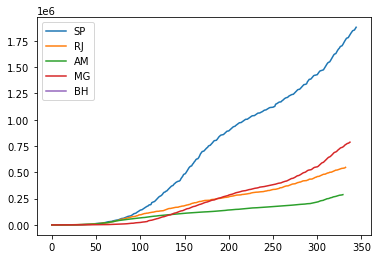

In [56]:
df_estados.plot()

# VERIFICANDO A CORRELAÇÃO ENTRE CASOS E MORTES UNSAM COEFICIENTE DE PEAESON

In [71]:
df_corr = pd.DataFrame()

In [72]:
sp_confirmed = desde1caso(data, ['SP'], 345, 'confirmed')
sp_deaths = desde1caso(data, ['SP'], 345, 'deaths')

In [73]:
df_corr = pd.concat([df_corr, sp_confirmed, sp_deaths], ignore_index=True, axis=1)
df_corr.columns = ['confirmed', 'deaths']

In [74]:
df_corr

,confirmed,deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
340,1845086,54545
341,1849334,54614
342,1851776,54663
343,1864977,55087


<AxesSubplot:>

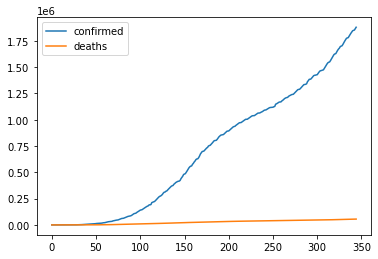

In [75]:
df_corr.plot()

In [77]:
df_corr.corr(method="spearman")

,confirmed,deaths
confirmed,1.000000,0.999918
deaths,0.999918,1.000000


In [78]:
df_corr = pd.DataFrame()

In [79]:
rj_confirmed = desde1caso(data, ['RJ'], 345, 'confirmed')
rj_deaths = desde1caso(data, ['RJ'], 345, 'deaths')

In [80]:
df_corr = pd.concat([df_corr, sp_confirmed, sp_deaths], ignore_index=True, axis=1)
df_corr.columns = ['confirmed', 'deaths']
df_corr

,confirmed,deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
340,1845086,54545
341,1849334,54614
342,1851776,54663
343,1864977,55087


<AxesSubplot:>

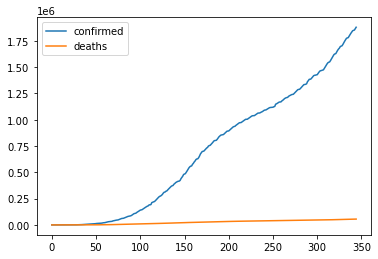

In [81]:
df_corr.plot()

In [82]:
df_corr.corr(method="spearman")

,confirmed,deaths
confirmed,1.000000,0.999918
deaths,0.999918,1.000000
